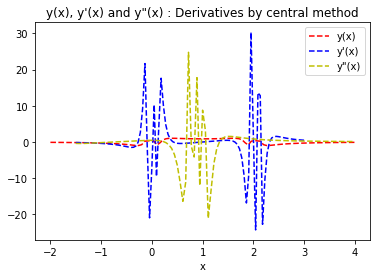

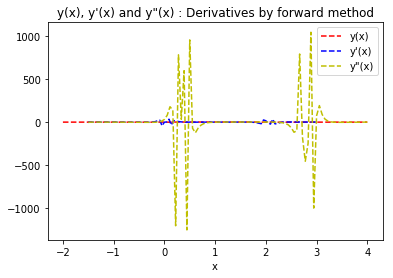

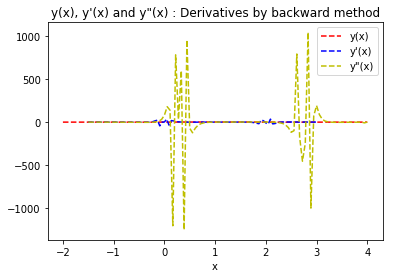

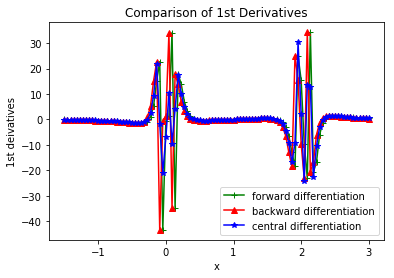

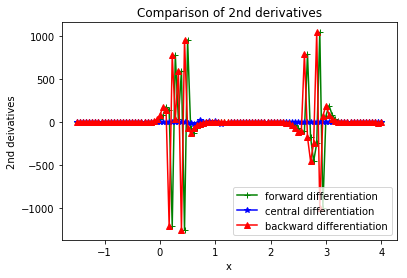

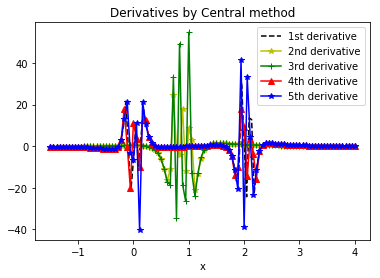

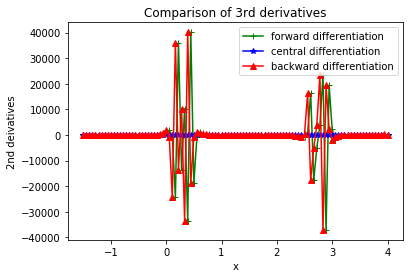

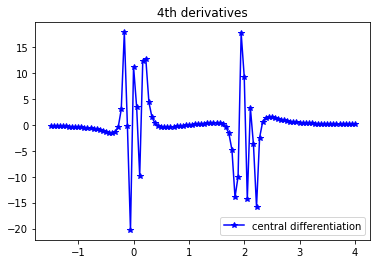

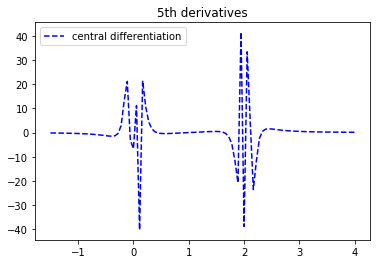

In [1]:
import math as math
import numpy as np
import time
import matplotlib.pyplot as plt
from array import array
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# define 1st order derivatives
def forwardiff(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(1,N):
        slop = (f(a+k*h)-f(a+(k-1)*h))/h
        g[k]=slop
    return g
    
def backwardiff(f,a,b,N):
    h = (b-a)/N
    g= np.zeros(N)
    for k in range(0,N-1):
        slop = (f(a+(k+1)*h)-f(a+k*h))/h
        g[k]=slop
    return g

def centraldiff(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(0,N):
        slop = (f(a+(k+1/2)*h)-f(a+(k-1/2)*h))/h
        g[k]=slop
    return g


def fordiff2(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(1,N):
        slop = (f(a+k*h)-f(a+(k-1)*h))/h
        g[k]=slop
    return g

# define 2nd order derivatives by central differentiation
def centraldiff2(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(0,N):
        slop = (f(a+(k+1)*h)-f(a+(k-1)*h))/(2*h)
        g[k]=slop
    return g

# define 3rd order derivatives by central differentiation
def centraldiff3(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(0,N):
        slop = (27*f(a+(k+1/2)*h)-27*f(a+(k-1/2)*h)+f(a+(k-3/2)*h)-f(a+(k+3/2)*h))/(24*h)
        g[k]=slop
    return g

# define 4th order derivative by central differentiation
def centraldiff4(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(0,N):
        slop = (8*f(a+(k+1)*h)-8*f(a+(k-1)*h)+f(a+(k-2)*h)-f(a+(k+2)*h))/(12*h)
        g[k]=slop
    return g

# define 5th order derivative by central differentiation
def centraldiff5(f,a,b,N):
    h = (b-a)/N
    g = np.zeros(N)
    for k in range(0,N):
        slop = ((75/64)*f(a+(k+1/2)*h)-(75/64)*f(a+(k-1/2)*h)-(3/640)*f(a+(k-5/2)*h)+(3/640)*f(a+(k+5/2)*h)+(25/384)*f(a+(k-3/2)*h)-(25/384)*f(a+(k+3/2)*h))/h
        g[k]=slop
    return g

# define higher order derivatives by forward differentiation method
def forhigh(f,a,b,N):
    h = (b-a)/N
    n = f.shape[0]
    g = np.zeros(n)
    for i in range(1,n-1):
        slop = (f[i]-f[i-1])/h
        g[i-1] = slop
    g[n-1] = 0    
    return g

# define higher order derivatives by backward differentiation method
def backhigh(f,a,b,N):
    h = (b-a)/N
    n = f.shape[0]
    g = np.zeros(n)
    g[0] = 0
    for i in range(2,n):
        slop = (f[i]-f[i-1])/h
        g[i-1] = slop
    return g
        


# define f(x) or y(x) and range of x
h = lambda x: np.sin(1/(2*x - (x**2)))
rangex = np.linspace(-2,4,num=101)
y = []
for i in rangex:
    y.append(h(i))

# 1st order derivatives
derf1 = forwardiff(h,-1.5,3,100) # 1st order derivative by forward differentiation
derb1 = backwardiff(h,-1.5,3,100) # 1st order derivative by backward differentiation 
derc1 = centraldiff(h,-1.5,3,100) # 1st order derivative by central differentiation
step = np.linspace(-1.5,3,num=100)

# 2nd order derivatives
derf2 = forhigh(derf1,-1.5,4,100) # 2nd order derivative by forward differentiation
derb2 = backhigh(derb1,-1.5,4,100) # 2nd order derivative by backward differentiation
derc2 = centraldiff2(h,0.5,4,100) # 2nd order derivative by central differentiation
step2 = np.linspace(-1.5,4,num=100)

# 3rd order derivatives
derf3 = forhigh(derf2,-1.5,4,100) # 3rd order derivative by forward differentiation
derb3 = backhigh(derb2,-1.5,4,100) # 3rd order derivative by backward differentiation
derc3 = centraldiff3(h,0.5,4,100) # 3rd order derivative by central differentiation
step3 = np.linspace(-1.5,4,num=100)

# 4th order derivatives
derc4 = centraldiff4(h,-1.5,4,100) # 4th order derivative by central differentiation
step4 = np.linspace(-1.5,4,num=100)

# 5th order derivatives
derc5 = centraldiff5(h,-1.5,4,100) # 5th order derivative by central differentiation
step5 = np.linspace(-1.5,4,num=100)


# plot of y(x), y'(x) and y''(x) : derivatives taken by central differentiation method
plt.plot(rangex, y, 'r--', label='y(x)')
plt.plot(step, derc1, 'b--', label='y\'(x)')
plt.plot(step2,derc2, 'y--', label='y\"(x)')
plt.title('y(x), y\'(x) and y\"(x) : Derivatives by central method')
plt.xlabel('x')
plt.legend()
plt.show()

# plot of y(x), y'(x) and y''(x) : derivatives taken by forward differentiation method
plt.plot(rangex, y, 'r--', label='y(x)')
plt.plot(step, derf1, 'b--', label='y\'(x)')
plt.plot(step2,derf2, 'y--', label='y\"(x)')
plt.title('y(x), y\'(x) and y\"(x) : Derivatives by forward method')
plt.xlabel('x')
plt.legend()
plt.show()


# plot of y(x), y'(x) and y''(x) : derivatives taken by backward differentiation method
plt.plot(rangex, y, 'r--', label='y(x)')
plt.plot(step, derb1, 'b--', label='y\'(x)')
plt.plot(step2,derb2, 'y--', label='y\"(x)')
plt.title('y(x), y\'(x) and y\"(x) : Derivatives by backward method')
plt.xlabel('x')
plt.legend()
plt.show()
          
 
    
# comparison of 1st derivatives by central, forward and backward differentiation methods
plt.plot(step, derf1, 'g+-', label='forward differentiation')
plt.plot(step, derb1, 'r^-', label='backward differentiation')
plt.plot(step, derc1, 'b*-', label='central differentiation')
plt.title('Comparison of 1st Derivatives')
plt.xlabel('x')
plt.ylabel('1st deivatives')
plt.legend()
plt.show()

# comparison of 2nd derivatives by central, forward and backward methods
plt.plot(step2, derf2, 'g+-', label='forward differentiation')
plt.plot(step2,derc2, 'b*-', label='central differentiation')
plt.plot(step2, derb2, 'r^-', label='backward differentiation')
plt.title('Comparison of 2nd derivatives')
plt.xlabel('x')
plt.ylabel('2nd deivatives')
plt.legend()
plt.show()

# comparison of 1st to 5th derivatives by central differentiation
plt.plot(step, derc1, 'k--', label='1st derivative')
plt.plot(step2,derc2, 'y*-', label='2nd derivative')
plt.plot(step3,derc3, 'g+-', label='3rd derivative')
plt.plot(step4,derc4, 'r^-', label='4th derivative')
plt.plot(step5,derc5, 'b*-', label='5th derivative')
plt.title('Derivatives by Central method')
plt.xlabel('x')
plt.legend()
plt.show()
    

# comparison of 3rd derivatives by central, forward methods
plt.plot(step3, derf3, 'g+-', label='forward differentiation')
plt.plot(step3,derc3, 'b*-', label='central differentiation')
plt.plot(step3,derb3, 'r^-', label='backward differentiation')
plt.title('Comparison of 3rd derivatives')
plt.xlabel('x')
plt.ylabel('2nd deivatives')
plt.legend()
plt.show()

# 4th derivtive by central method
plt.plot(step4,derc4, 'b*-', label='central differentiation')
plt.title('4th derivatives')
plt.legend()
plt.show()
    
# 5th derivative by central method    
plt.plot(step5,derc5, 'b--', label='central differentiation')
plt.title('5th derivatives')
plt.legend()
plt.show()


